In [4]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [5]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=9e3e7a6cc7302d0156034fc2cf2093d4d3c5d2d2a12ada543c2991b229bb5675
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import h2o
from h2o.automl import H2OAutoML

**Initialize H2O**

In [81]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 1 min
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_w5gdrk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [82]:
min_mem_size=6
run_time=222

In [83]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

4


In [84]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:17233..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbwv99lu9
  JVM stdout: /tmp/tmpbwv99lu9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbwv99lu9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:17233
Connecting to H2O server at http://127.0.0.1:17233 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_an1ygl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [85]:
#Reading the dataset
df = h2o.import_file("Housing.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [86]:
numeric_cols=[]
cat_cols=[]
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"The column '{column}' is numeric.")
        numeric_cols.append(column)
    else:
        print(f"The column '{column}' is not numeric.")
        cat_cols.append(column)

The column 'price' is numeric.
The column 'area' is numeric.
The column 'bedrooms' is numeric.
The column 'bathrooms' is numeric.
The column 'stories' is numeric.
The column 'mainroad' is not numeric.
The column 'guestroom' is not numeric.
The column 'basement' is not numeric.
The column 'hotwaterheating' is not numeric.
The column 'airconditioning' is not numeric.
The column 'parking' is numeric.
The column 'prefarea' is not numeric.
The column 'furnishingstatus' is not numeric.


In [87]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [88]:
for col in cat_cols:
    df[col] = df[col].asnumeric()
df

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1.33e+07,7420,4,2,3,1,0,0,0,1,2,1,0
1.225e+07,8960,4,4,4,1,0,0,0,1,3,0,0
1.225e+07,9960,3,2,2,1,0,1,0,0,2,1,1
1.2215e+07,7500,4,2,2,1,0,1,0,1,3,1,0
1.141e+07,7420,4,1,2,1,1,1,0,1,2,0,0
1.085e+07,7500,3,3,1,1,0,1,0,1,2,1,1
1.015e+07,8580,4,3,4,1,0,0,0,1,2,1,1
1.015e+07,16200,5,3,2,1,0,0,0,0,0,0,2
9.87e+06,8100,4,1,2,1,1,1,0,1,2,1,0
9.8e+06,5750,3,2,4,1,1,0,0,1,1,1,2


In [89]:
# Reading file using pandas
dff = pd.read_csv('Housing.csv')

In [90]:
dff.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [91]:
numeric_cols=[]
cat_cols=[]
for column in dff.columns:
    if pd.api.types.is_numeric_dtype(dff[column]):
        print(f"The column '{column}' is numeric.")
        numeric_cols.append(column)
    else:
        print(f"The column '{column}' is not numeric.")
        cat_cols.append(column)

The column 'price' is numeric.
The column 'area' is numeric.
The column 'bedrooms' is numeric.
The column 'bathrooms' is numeric.
The column 'stories' is numeric.
The column 'mainroad' is not numeric.
The column 'guestroom' is not numeric.
The column 'basement' is not numeric.
The column 'hotwaterheating' is not numeric.
The column 'airconditioning' is not numeric.
The column 'parking' is numeric.
The column 'prefarea' is not numeric.
The column 'furnishingstatus' is not numeric.


In [92]:
from sklearn.preprocessing import LabelEncoder
lec=LabelEncoder()

In [93]:
for col in cat_cols:
    dff[col]=lec.fit_transform(dff[col])
dff

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [94]:
dff.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


**Check the correlation between all features in the data**

In [36]:
dff.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


**Create the heat map of the correlation**

<Axes: >

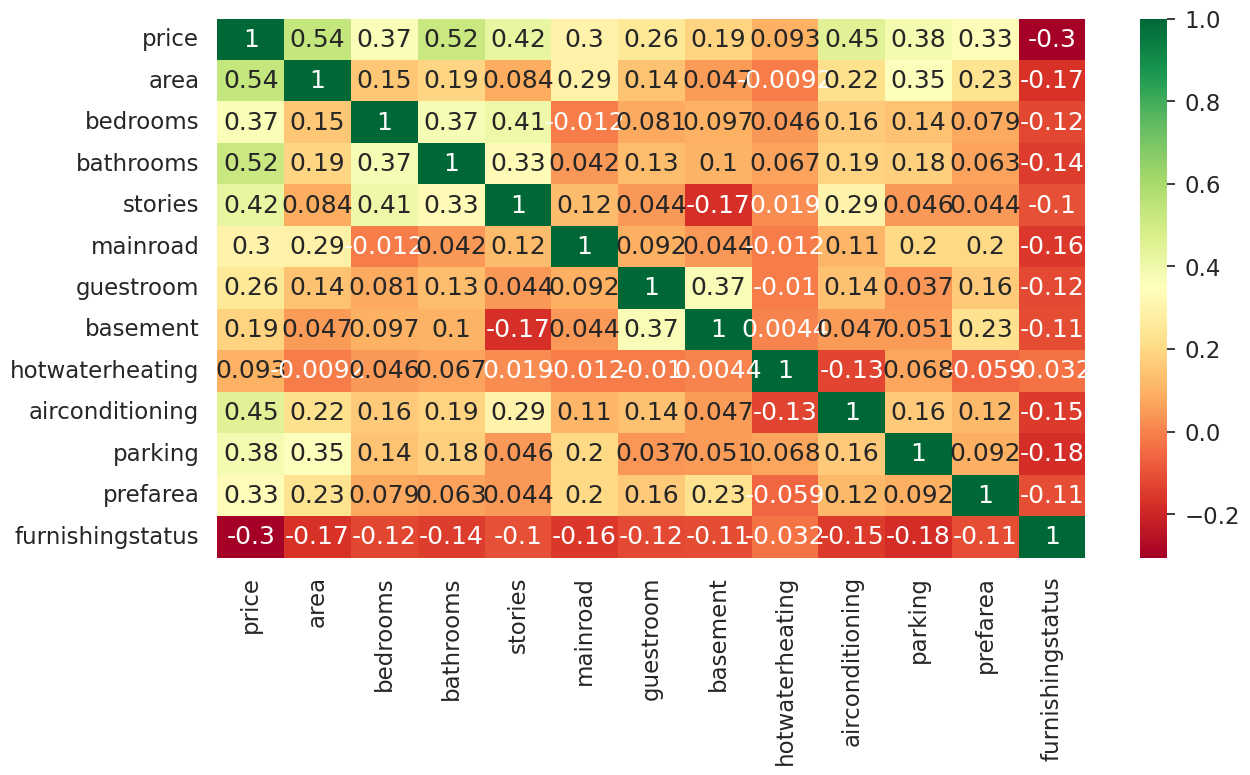

In [113]:
plt.figure(figsize=(14,7))
sns.heatmap(dff.corr(), annot=True, cmap='RdYlGn')

**Q4 In the multivariate models are predictor variables independent of all the other predictor variables?**

A. No, in general, predictor variables in multivariate models are not independent of all other predictor variables. This is because correlation or interdependence between predictor variables is quite common in real-world datasets. In the heatmap, for example, there is a moderate positive correlation between the number of bedrooms and bathrooms (0.41). This means that houses with more bedrooms tend to also have more bathrooms, and vice versa.

**Identifing predictor significance**

In [38]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(dff['price'], dff[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              997.4
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                        0.00
Time:                        02:00:17   Log-Likelihood:                         -8333.1
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     533   BIC:                                  1.674e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
area               246.2315     23.564     10.449      0.000     199.942     292.521
bedrooms           1.35e+05   6.06e+04      2.227      0.026    1.59e+04    2.54e+05
bathrooms         9.962e+05   1.02e+05      9.793      0.000    7.96e+05     1.2e+06
stories           4.513e+05   6.42e+04      7.032      0.000    3.25e+05    5.77e+05
mainroad          4.462e+05   1.29e+05      3.449      0.001    1.92e+05       7e+05
guestroom          2.96e+05   1.32e+05      2.247      0.025    3.72e+04    5.55e+05
basement          3.621e+05    1.1e+05      3.299      0.001    1.46e+05    5.78e+05
hotwaterheating   8.737e+05   2.23e+05      3.916      0.000    4.35e+05    1.31e+06
airconditioning   8.516e+05   1.08e+05      7.876      0.000    6.39e+05    1.06e+06
parking            2.78e+05   5.84e+04      4.762      0.000    1.63e+05    3.93e+05
prefarea          6.437e+05   1.15e+05      5.576      0.000    4.17e+05     8.7e+05
furnishingstatus -2.026e+05   5.68e+04     -3.568      0.000   -3.14e+05    -9.1e+04
==============================================================================
Omnibus:                       92.287   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.741
Skew:                           0.852   Prob(JB):                     1.44e-52
Kurtosis:                       5.759   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Q1. Is the relationship significant?**

A: yes, because the R-squared is 0.956 which is very high and all features' p value is less than 0.05, so the relationship is very much significant

**VIF(multicollinearity)**

In [39]:
dfpd = dff[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']].dropna() #subset the dataframe

In [40]:
# the independent variables set
X = dff[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

             feature        VIF
0               area   8.270130
1           bedrooms  16.368165
2          bathrooms   9.408363
3            stories   7.880723
4           mainroad   6.852485
5          guestroom   1.472838
6           basement   2.013876
7    hotwaterheating   1.089167
8    airconditioning   1.759717
9            parking   1.985880
10          prefarea   1.492621
11  furnishingstatus   2.648467


**Q3 Is there any multicollinearity in the model?**

A. Yes, the Variance Inflation Factor (VIF) values in the table suggest the presence of multicollinearity in the model. The VIF measures for bedrooms, bathrooms and area suggest that there might be multicollinearity issues among these features.

**Regularization**

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

Using Linear Regression

In [115]:
X = dff[ [ 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]

y = dff['price']

#Spliting data into Training 75%, Test set 25%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [116]:
# Now you can proceed with your model training using scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[6306184.99853402 6382815.33036904 6503757.62570935 5517057.31496407
 4190513.06064557 2890560.34980835 2825519.98809754 7456399.68741894
 2463883.6374958  4433519.70241355 3840003.85872743 3598782.80968871
 4714074.52405401 4703364.48029864 5345602.22642141 7932556.1986729
 4259764.42829893 3468761.22243248 6660506.90939648 2705719.00819657
 4589262.51648832 5250969.11359292 5291283.29946309 3471192.07354887
 5456396.34439679 7012256.30931821 2836010.28169568 7408729.27062401
 7665654.20309498 4365702.88977178 7581072.4372923  6745324.35327798
 4957205.80146407 4610938.3555596  6147923.00841869 4623047.54934472
 6469276.76677232 3391968.14577148 5007087.61225255 5749790.4746391
 3958885.57899531 3315386.93574516 3688270.96953517 4469677.21171671
 6309420.41528887 3389328.51942848 4858830.47350133 2769205.63318933
 2654495.32489272 3327731.195882   4978688.02952748 4474006.90302798
 2669822.37068782 3117042.31301695 5066791.63979853 4318567.90009779
 3271394.63543931 4068805.12049266 3

**Q2. Are any model assumptions violated?**

A. Assumptions for linear regression are:

1. Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.
2. No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between variables Bedrooms and Bathrooms.
Overall, the model is regression which make sense to all models in AutoML.

In [117]:
print("mean squared error:" , mean_squared_error(y_test,y_pred), "\n")
print("r2_score : ", r2_score(y_test, y_pred))

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

mean squared error: 1472007275798.8765 

r2_score :  0.628028419513983


1213263.0694943601

Using Ridge Regression

In [99]:
X = dff[ [ 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]

y = dff['price']

#Spliting data into Training 75%, Test set 25%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [46]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [102]:
# rmse after regularization
y_pred = ridge.predict(X_test)

print("mean squared error:" , mean_squared_error(y_test,y_pred), "\n")
print("r2_score : ", r2_score(y_test, y_pred), "\n")

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

mean squared error: 1471892230987.4038 

r2_score :  0.6280574909737875 



1213215.6572462309

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [119]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define the RandomForestRegressor
rf_model = RandomForestRegressor()

In [121]:
# Specify the hyperparameters and their possible values for the RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Adjust the number of iterations as needed
    cv=5,  # Cross-validation folds
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    random_state=1
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=1, scoring='neg_mean_squared_error')

In [122]:
# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Root Mean Squared Error (RMSE): 1177800.7640443237


**Q9 Which hyperparameters are important?**

A. All hyperparameters are important because they determined the way model works, however, there are some more important one, such as n_estimators,min_samples_split, min_samples_leaf, max_features and max_depth.

**H2O**

In [54]:
dff = h2o.H2OFrame(dff)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [55]:
dff.head()

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1.33e+07,7420,4,2,3,1,0,0,0,1,2,1,0
1.225e+07,8960,4,4,4,1,0,0,0,1,3,0,0
1.225e+07,9960,3,2,2,1,0,1,0,0,2,1,1
1.2215e+07,7500,4,2,2,1,0,1,0,1,3,1,0
1.141e+07,7420,4,1,2,1,1,1,0,1,2,0,0
1.085e+07,7500,3,3,1,1,0,1,0,1,2,1,1
1.015e+07,8580,4,3,4,1,0,0,0,1,2,1,1
1.015e+07,16200,5,3,2,1,0,0,0,0,0,0,2
9.87e+06,8100,4,1,2,1,1,1,0,1,2,1,0
9.8e+06,5750,3,2,4,1,1,0,0,1,1,1,2


In [56]:
train, test = dff.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [57]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [58]:
drift_data["is_train"].table()

is_train,Count
0,130
1,415


**Start to train in 10 models by AutoML**

In [59]:
x = list(set(train.col_names) - set(["price"]))

In [61]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="price", training_frame=train)

AutoML progress: |
02:26:20.56: _train param, Dropping bad and constant columns: [is_train]

█
02:26:28.90: _train param, Dropping bad and constant columns: [is_train]


02:26:28.875: _train param, Dropping bad and constant columns: [is_train]

█
02:26:31.15: _train param, Dropping bad and constant columns: [is_train]

██
02:26:33.928: _train param, Dropping bad and constant columns: [is_train]

█
02:26:37.463: _train param, Dropping bad and constant columns: [is_train]

█
02:26:38.963: _train param, Dropping bad and constant columns: [is_train]
02:26:40.123: _train param, Dropping bad and constant columns: [is_train]

█
02:26:41.68: _train param, Dropping bad and constant columns: [is_train]

██
02:26:43.399: _train param, Dropping bad and constant columns: [is_train]

███
02:26:46.944: _train param, Dropping unused columns: [is_train]
02:26:47.952: _train param, Dropping unused columns: [is_train]

███████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20240220_22619


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    37                 37                          12520                  6            8            7.75676       15            27            22.1622

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 679876728550.8033
RMSE: 824546.3774408347
MAE: 581657.3867469879
RMSLE: 0.16634498686383664
Mean Residual Deviance: 679876728550.8033

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 1368624756443.0667
RMSE: 1169882.3686350123
MAE: 817761.86020515
RMSLE: 0.2279402907412875
Mean Residual Deviance: 1368624756443.0667

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     827646       112393       827318        988666        772285        864395        685568
mean_residual_deviance  1.40254e+12  3.99113e+11  1.2858e+12    1.9175e+12    1.38702e+12   1.58858e+12   8.33771e+11
mse                     1.40254e+12  3.99113e+11  1.2858e+12    1.9175e+12    1.38702e+12   1.58858e+12   8.33771e+11
r2                      0.587428     0.111677     0.653452      0.449928      0.594739      0.508809      0.730211
residual_deviance       1.40254e+12  3.99113e+11  1.2858e+12    1.9175e+12    1.38702e+12   1.58858e+12   8.33771e+11
rmse                    1.17398e+06  174325       1.13393e+06   1.38474e+06   1.17772e+06   1.26039e+06   913111
rmsle                   0.229487     0.0284255    0.226793      0.25946       0.219015      0.253297      0.188869

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-02-20 02:26:39  0.992 sec   0                  1.84123e+06      1.41484e+06     3.39015e+12
    2024-02-20 02:26:39  1.011 sec   5                  1.4022e+06       1.03285e+06     1.96617e+12
    2024-02-20 02:26:39  1.027 sec   10                 1.16612e+06      826322          1.35983e+12
    2024-02-20 02:26:40  1.043 sec   15                 1.03708e+06      718064          1.07553e+12
    2024-02-20 02:26:40  1.070 sec   20                 956217           662938          9.14351e+11
    2024-02-20 02:26:40  1.089 sec   25                 904109           625872          8.17413e+11
    2024-02-20 02:26:40  1.105 sec   30                 865392           602931          7.48903e+11
    2024-02-20 02:26:40  1.121 sec   35                 838278           586533          7.02709e+11
    2024-02-20 02:26:40  1.129 sec   37                 824546           581657          6.79877e+11

Variable Importances: 
variable          relative_importance    scaled_importance    percentage
----------------  ---------------------  -------------------  ------------
area              2.09588e+15            1                    0.375038
bathrooms         1.34615e+15            0.642286             0.240882
stories           3.94341e+14            0.18815              0.0705636
furnishingstatus  3.70412e+14            0.176734             0.0662818
airconditioning   3.69119e+14            0.176117             0.0660504
parking           3.40871e+14            0.162639             0.0609957
bedrooms          2.39534e+14            0.114288             0.0428624
prefarea          1.68322e+14            0.0803107            0.0301196
basement       

In [62]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GBM_3_AutoML_1_20240220_22619,817762,1.16988e+06,1.36862e+12,0.22794,1.36862e+12
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_22619,825705,1.18962e+06,1.41519e+12,0.233276,1.41519e+12
StackedEnsemble_AllModels_1_AutoML_1_20240220_22619,827935,1.17828e+06,1.38834e+12,0.230723,1.38834e+12
DRF_1_AutoML_1_20240220_22619,829776,1.18965e+06,1.41528e+12,0.233038,1.41528e+12
GBM_4_AutoML_1_20240220_22619,832244,1.18591e+06,1.40639e+12,0.230866,1.40639e+12
GBM_2_AutoML_1_20240220_22619,833128,1.18762e+06,1.41045e+12,0.232747,1.41045e+12
XRT_1_AutoML_1_20240220_22619,863949,1.21653e+06,1.47994e+12,0.245587,1.47994e+12
XGBoost_1_AutoML_1_20240220_22619,866565,1.21402e+06,1.47384e+12,0.244782,1.47384e+12
XGBoost_3_AutoML_1_20240220_22619,871583,1.28547e+06,1.65243e+12,0.252563,1.65243e+12
GBM_1_AutoML_1_20240220_22619,953613,1.3377e+06,1.78945e+12,0.262077,1.78945e+12


**Q8. Does regularization help?**

A. no, the rmse from the best model is very less as compared to rmse in regularization.

In [63]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1245148219290.495
RMSE: 1115862.0968966081
MAE: 828656.3196592308
RMSLE: 0.21761496322713378
Mean Residual Deviance: 1245148219290.495

 **The importance of every variables**

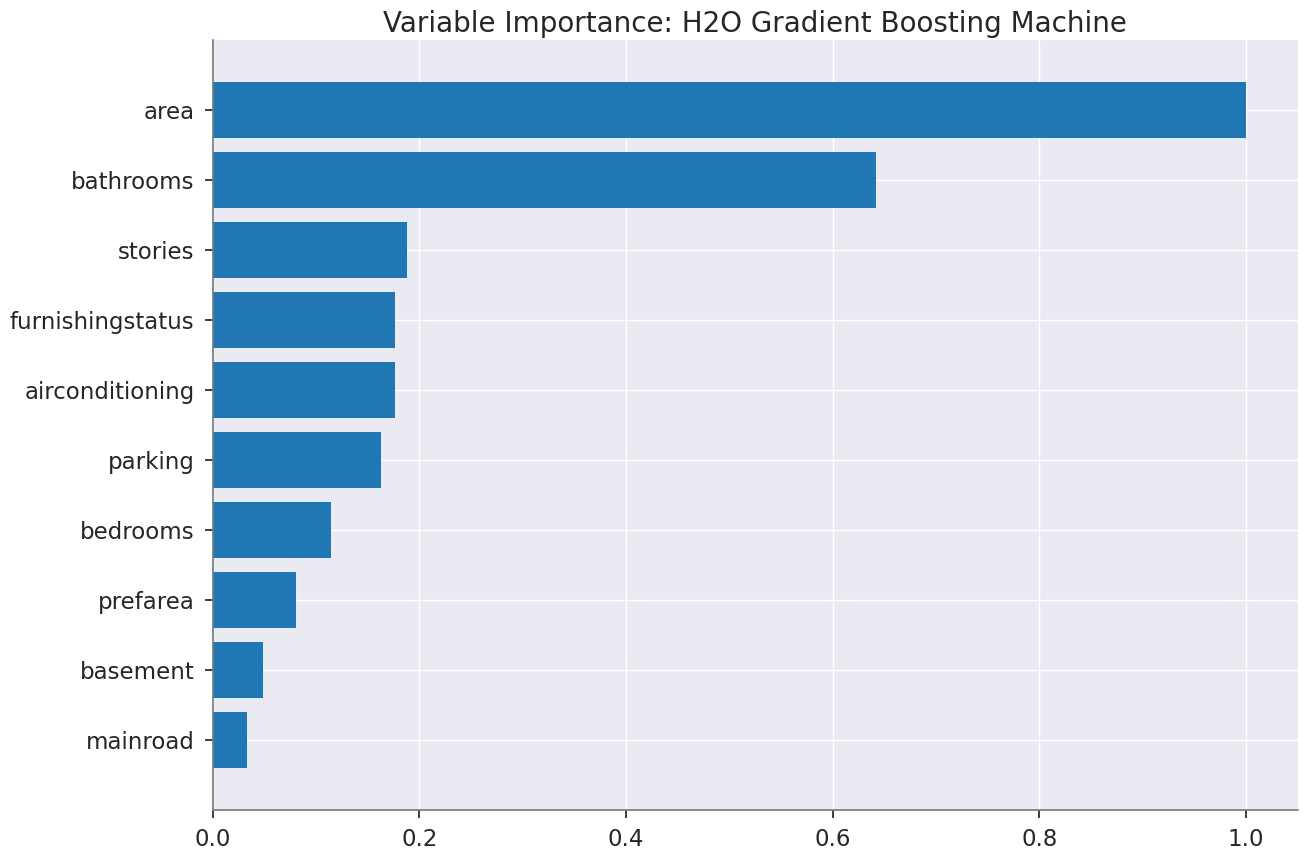

<Figure size 800x550 with 0 Axes>

In [64]:
%matplotlib inline
best_model.varimp_plot()

**Q6. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

A: The most significant predictor variable is area, and mainroad is the most insiginificant one.

**Q8. Which independent variables are significant?**

A. The most significant predictor variable is area

**Q7. Does the model make sense?**

A: yes, the qustion is a regression question and models in AutoML can deal with it.